In [1]:
## basic libraries to manupulate data manupulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Next import the data

# Training data
titanic_training = pd.read_csv('datas/train.csv')


# Test data
titanic_test = pd.read_csv('datas/test.csv')

titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
passengerId = titanic_test.PassengerId
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_training.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
len(titanic_training.Cabin.value_counts())

147

In [6]:
titanic_training.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
titanic_training.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# let see what column it contain

titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### As we have seen in the above cell we have 5 object column and 6 numeric column now lets change the object column to numeric column


**Before that lets see if there is null column**

In [10]:
titanic_training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**As we have seen on  the table there is a name column which is not helpfull to predict if They have to surviv ot not so we have drop that column

In [11]:
# we are writing a function do preprocess our data
def preprocess(data):
    
    data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
    
    
    for name,column in data.items():
        if pd.api.types.is_numeric_dtype(column):
            if column.isna().sum():
                data[name] = column.fillna(column.median())
    return data


In [12]:
# pd.Categorical(titanic_training.Cabin).codes

In [13]:
titanic_training = preprocess(titanic_training)

titanic_training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
for name,column in titanic_training.items():
        if not pd.api.types.is_numeric_dtype(column):
            titanic_training[name] = pd.Categorical(column).codes

<AxesSubplot:>

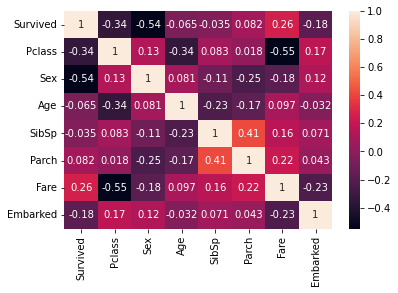

In [21]:

sns.heatmap(titanic_training.corr(),annot=True,)

In [22]:
titanic_training.dropna(subset=['Embarked'],inplace=True)
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Predicting using Xgboost**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

import xgboost as xgb

In [24]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(titanic_training.drop('Survived',axis=1),titanic_training.Survived,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [25]:

train = xgb.DMatrix(X_train,label=y_train)
test = xgb.DMatrix(X_test,label=y_test)



In [71]:
params = {
    'max_depth': 8,
    'eta':0.2,
    'objective':'multi:softmax',
    'num_class':3
}
epochs = 10

model = xgb.train(params,train,epochs)

In [72]:
predictions = model.predict(test)
print(predictions)

[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


In [73]:
accuracy_score(y_test,predictions)

0.8435754189944135

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
x = titanic_training_proce.drop('Survived',axis=1)
y = titanic_training_proce.Survived

catagorical_features = ['Sex','Cabin','Embarked']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,catagorical_features)],remainder='passthrough')

transformed_x = transformer.fit_transform(x)

transformed_x

<891x159 sparse matrix of type '<class 'numpy.float64'>'
	with 5827 stored elements in Compressed Sparse Row format>

In [28]:
tx_df = pd.DataFrame(transformed_x)
tx_df

,0
0,"(0, 1)\t1.0\n (0, 149)\t1.0\n (0, 152)\t1...."
1,"(0, 0)\t1.0\n (0, 83)\t1.0\n (0, 150)\t1.0..."
2,"(0, 0)\t1.0\n (0, 149)\t1.0\n (0, 152)\t1...."
3,"(0, 0)\t1.0\n (0, 57)\t1.0\n (0, 152)\t1.0..."
4,"(0, 1)\t1.0\n (0, 149)\t1.0\n (0, 152)\t1...."
...,...
886,"(0, 1)\t1.0\n (0, 149)\t1.0\n (0, 152)\t1...."
887,"(0, 0)\t1.0\n (0, 32)\t1.0\n (0, 152)\t1.0..."
888,"(0, 0)\t1.0\n (0, 149)\t1.0\n (0, 152)\t1...."
889,"(0, 1)\t1.0\n (0, 62)\t1.0\n (0, 150)\t1.0..."


In [27]:
sns.heatmap(tx_df.corr)
# fig, ax = plt.subplots(figsize=(30,20))

# ax = sns.heatmap(tx_df.corr(),cmap="cividis",annot=True,fmt='.2f')


ValueError: Must pass 2-d input. shape=()

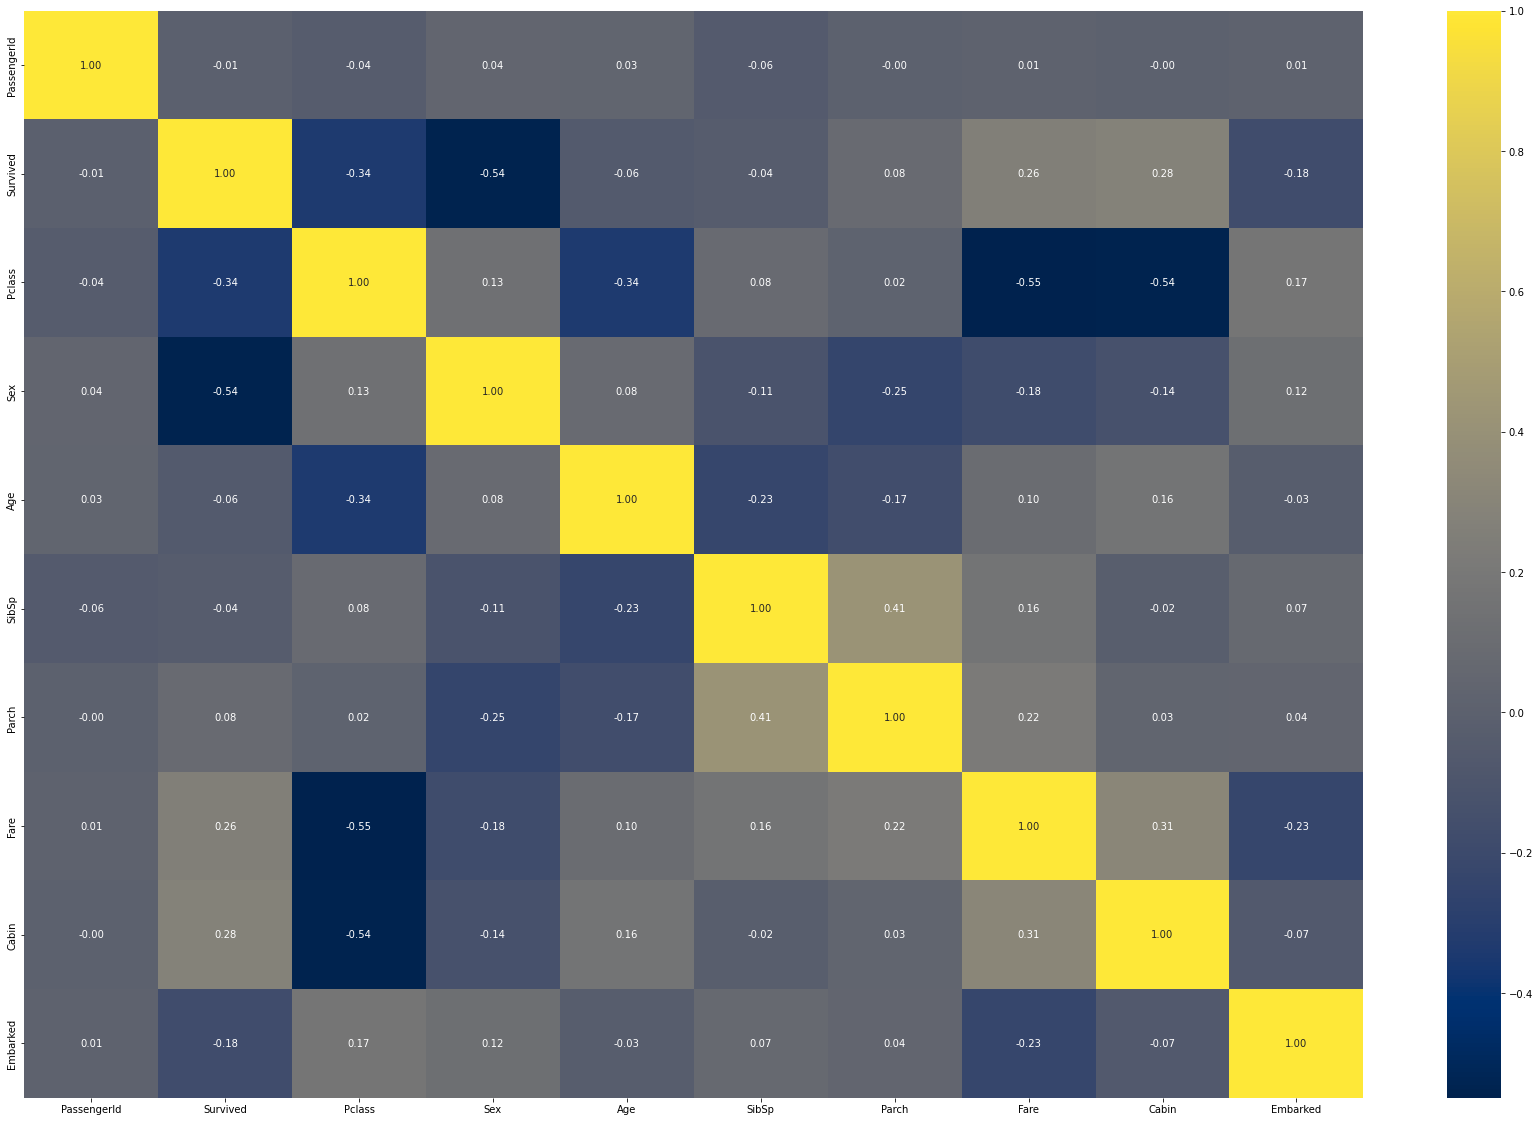

In [138]:
# sns.heatmap(titanic_training_proce.corr)
# fig, ax = plt.subplots(figsize=(30,20))

# ax = sns.heatmap(titanic_training_proce.corr(),cmap="cividis",annot=True,fmt='.2f')


### lets see if there is null value

In [121]:
titanic_training_proce.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Now we don't have a null value and all of our columns as numeric dtype**

In [122]:
# Importing a machin learning models and evaluation libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

In [142]:
titanic_training_proce.drop('PassengerId',axis=1,inplace=True)
x, y = titanic_training_proce.drop('Survived',axis=1),titanic_training_proce.Survived

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,22.0,1,0,7.2500,0,3
1,1,1,38.0,1,0,71.2833,82,1
2,3,1,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,56,3
4,3,2,35.0,0,0,8.0500,0,3


In [144]:
np.random.seed(42)

log_model = LogisticRegression()

rf_model = RandomForestClassifier()

log_cross_val_score = cross_val_score(log_model,x,y,cv=5,n_jobs=-1,error_score='raise',verbose=True)

rf_cross_val_score = cross_val_score(rf_model,x,y,cv=5,n_jobs=-1,error_score='raise',verbose=True)

log_cross_val_score.mean(),rf_cross_val_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


(0.8024668884564686, 0.8114870378507314)

In [145]:
np.random.seed(42)

log_model = LogisticRegression()

rf_model = RandomForestClassifier()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)


log_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

log_model.score(x_test,y_test)

C:\Users\ABDU\Desktop\project\data-science\titanic-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8444444444444444

In [146]:
rf_model.score(x_test,y_test)

0.8555555555555555

**Our `RandomForestClassifier` model is working good lets tune the hyperparamter**

In [150]:
# lets start with linearRegression
np.random.seed(42)
linear_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}
np.random.seed(42)

linear_grid_search = GridSearchCV(LogisticRegression(),linear_grid,cv=5,verbose=True,n_jobs=-1)

linear_grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [151]:
linear_grid_search.best_params_

{'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}

In [152]:
linear_grid_search.score(x_test,y_test)
y_pred = linear_grid_search.predict(x_test)

accuracy_score(y_test,y_pred)

0.8444444444444444

In [153]:
# # Test data
# titanic_test = pd.read_csv('datas/test.csv')


In [155]:
titanic_test_pros = preprocess(titanic_test)

passenger_id = titanic_test_pros.PassengerId

titanic_test_pros.drop('PassengerId',axis=1,inplace=True)

titanic_test_pros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int8   
 7   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(3)
memory usage: 17.7 KB


In [156]:
test_pred = linear_grid_search.predict(titanic_test_pros)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

TypeError: only size-1 arrays can be converted to Python scalars

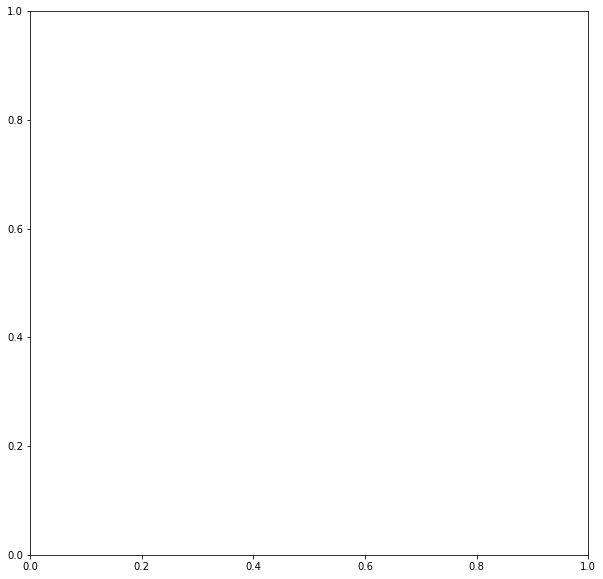

In [165]:
results = pd.DataFrame({'pre':[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],'current':[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]})

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(results,height=1,cmap='winter')

# ax.scatter(ax.scatter(x=[0,1],y=results.current,cmap='summer'))

# results.T.plot(x=[0,1],y=[results.pre],kind='scatter')

In [133]:
return_df = pd.DataFrame({'PassengerId':titanic_test.PassengerId,'Survived':test_pred})

In [134]:
return_df.to_csv('datas/result.csv',index=False)

In [104]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,0,3
2,2,2,62.0,0,0,9.6875,0,2
3,3,2,27.0,0,0,8.6625,0,3
4,3,1,22.0,1,1,12.2875,0,3


In [106]:
titanic_test_pros.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,0,3
2,2,2,62.0,0,0,9.6875,0,2
3,3,2,27.0,0,0,8.6625,0,3
4,3,1,22.0,1,1,12.2875,0,3


#### As we can see After tuning Logistic regression with grid search cv now we Improve the model from 0.8 to 0.9

### Now we try with RandomForest

In [58]:
rf_gr = {
    'n_estimators':np.arange(10,150,20),
    'max_depth': [None,2,6,8],
    'min_samples_split':np.arange(2,16,2),
    'min_samples_leaf':np.arange(1,16,2),
    'max_features': ['auto','sqrt']
}

np.random.seed(42)

rf_grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1),rf_gr,cv=5,verbose=True)

rf_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3136 candidates, totalling 15680 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
             verbose=True)

In [59]:
rf_grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 110}

In [60]:
rf_grid_search.score(x_test,y_test)

0.8333333333333334

In [68]:
y_pred = linear_grid_search.predict(x_test)

In [69]:
matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

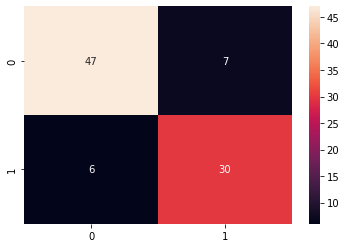

In [73]:
sns.heatmap(matrix,annot=True)